## Logistic Regression with Interaction Terms
### Authors: Shuo Xu

#### Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import data

In [2]:
df_bridge = pd.read_csv('bridge.csv')
df_claims = pd.read_csv('dim_claims.csv')
df_date = pd.read_csv('dim_date.csv')
df_pa = pd.read_csv('dim_pa.csv')

In [3]:
df_bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [4]:
df_bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [5]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [6]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [7]:
df_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [8]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [9]:
df_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [20]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


#### Merge dataframes

In [337]:
#merge tables
dim = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
dim = pd.merge(dim, df_date, how="left", on=["dim_date_id"])
dim = pd.merge(df_pa,dim,how="left", on=["dim_pa_id"])
dim.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1,1,0,1,1,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,1,0,0,1,3,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
2,3,0,0,1,1,10,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,1,1,0,1,11,1,999001,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
4,5,0,1,0,1,15,1,417614,A,70.0,0,2017-01-01,2017,1,1,1,0,0,1


In [338]:
df_X = pd.DataFrame({
                    "pa_approved": dim['pa_approved'],
                    "correct_diagnosis": dim['correct_diagnosis'],
                    "tried_and_failed": dim['tried_and_failed'],
                    "contraindication": dim['contraindication'],
                    "417380": pd.get_dummies(dim.bin)[417380].values.tolist(),
                    "417614": pd.get_dummies(dim.bin)[417614].values.tolist(),
                    "999001": pd.get_dummies(dim.bin)[999001].values.tolist(),
                    "417740": pd.get_dummies(dim.bin)[417740].values.tolist(),
                    "A": pd.get_dummies(dim.drug)['A'].values.tolist(),
                    "B": pd.get_dummies(dim.drug)['B'].values.tolist(),
                    "C": pd.get_dummies(dim.drug)['C'].values.tolist(),
                    "70": pd.get_dummies(dim.reject_code)[70.0].values.tolist(),
                    "75": pd.get_dummies(dim.reject_code)[75.0].values.tolist(),
                    "76": pd.get_dummies(dim.reject_code)[76.0].values.tolist()
                    })
df_X.head()

,pa_approved,correct_diagnosis,tried_and_failed,contraindication,417380,417614,999001,417740,A,B,C,70,75,76
0,1,1,1,0,1,0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,0,1,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,0,0,1,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,0,1,0,0,1,0,0


#### Create Interaction Terms

In [339]:
df_X['417380_cd'] = df_X['417380']*df_X.correct_diagnosis
df_X['417614_cd'] = df_X['417614']*df_X.correct_diagnosis
df_X['999001_cd'] = df_X['999001']*df_X.correct_diagnosis
df_X['417740_cd'] = df_X['417740']*df_X.correct_diagnosis
df_X['A_cd'] = df_X['A']*df_X.correct_diagnosis
df_X['B_cd'] = df_X['B']*df_X.correct_diagnosis
df_X['C_cd'] = df_X['C']*df_X.correct_diagnosis
df_X['70_cd'] = df_X['70']*df_X.correct_diagnosis
df_X['75_cd'] = df_X['75']*df_X.correct_diagnosis
df_X['76_cd'] = df_X['76']*df_X.correct_diagnosis

In [340]:
df_X['417380_tf'] = df_X['417380']*df_X.tried_and_failed
df_X['417614_tf'] = df_X['417614']*df_X.tried_and_failed
df_X['999001_tf'] = df_X['999001']*df_X.tried_and_failed
df_X['417740_tf'] = df_X['417740']*df_X.tried_and_failed
df_X['A_tf'] = df_X['A']*df_X.tried_and_failed
df_X['B_tf'] = df_X['B']*df_X.tried_and_failed
df_X['C_tf'] = df_X['C']*df_X.tried_and_failed
df_X['70_tf'] = df_X['70']*df_X.tried_and_failed
df_X['75_tf'] = df_X['75']*df_X.tried_and_failed
df_X['76_tf'] = df_X['76']*df_X.tried_and_failed

In [341]:
df_X['417380_con'] = df_X['417380']*df_X.contraindication
df_X['417614_con'] = df_X['417614']*df_X.contraindication
df_X['999001_con'] = df_X['999001']*df_X.contraindication
df_X['417740_con'] = df_X['417740']*df_X.contraindication
df_X['A_con'] = df_X['A']*df_X.contraindication
df_X['B_con'] = df_X['B']*df_X.contraindication
df_X['C_con'] = df_X['C']*df_X.contraindication
df_X['70_con'] = df_X['70']*df_X.contraindication
df_X['75_con'] = df_X['75']*df_X.contraindication
df_X['76_con'] = df_X['76']*df_X.contraindication

In [362]:
df_X2['417380_con'] = df_X2['417380']*df_X2.contraindication
df_X2['417614_con'] = df_X2['417614']*df_X2.contraindication
df_X2['999001_con'] = df_X2['999001']*df_X2.contraindication
df_X2['417740_con'] = df_X2['417740']*df_X2.contraindication
df_X2['A_con'] = df_X2['A']*df_X2.contraindication
df_X2['B_con'] = df_X2['B']*df_X2.contraindication
df_X2['C_con'] = df_X2['C']*df_X2.contraindication

In [342]:
df_X.head()

,pa_approved,correct_diagnosis,tried_and_failed,contraindication,417380,417614,999001,417740,A,B,...,417380_con,417614_con,999001_con,417740_con,A_con,B_con,C_con,70_con,75_con,76_con
0,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [395]:
X = df_X.iloc[:,1:]
Y = df_X.iloc[:,0]

In [396]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

In [397]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [398]:
accs = []
cutoffs =  np.arange(0,1.01,.01)
for cutoff in cutoffs:
    X_train_prob = log_reg.predict_proba(X_train)[:,1]
    Y_train_pred = 1*(X_train_prob>cutoff)
    accs.append(np.sum(Y_train_pred==Y_train)/len(Y_train))

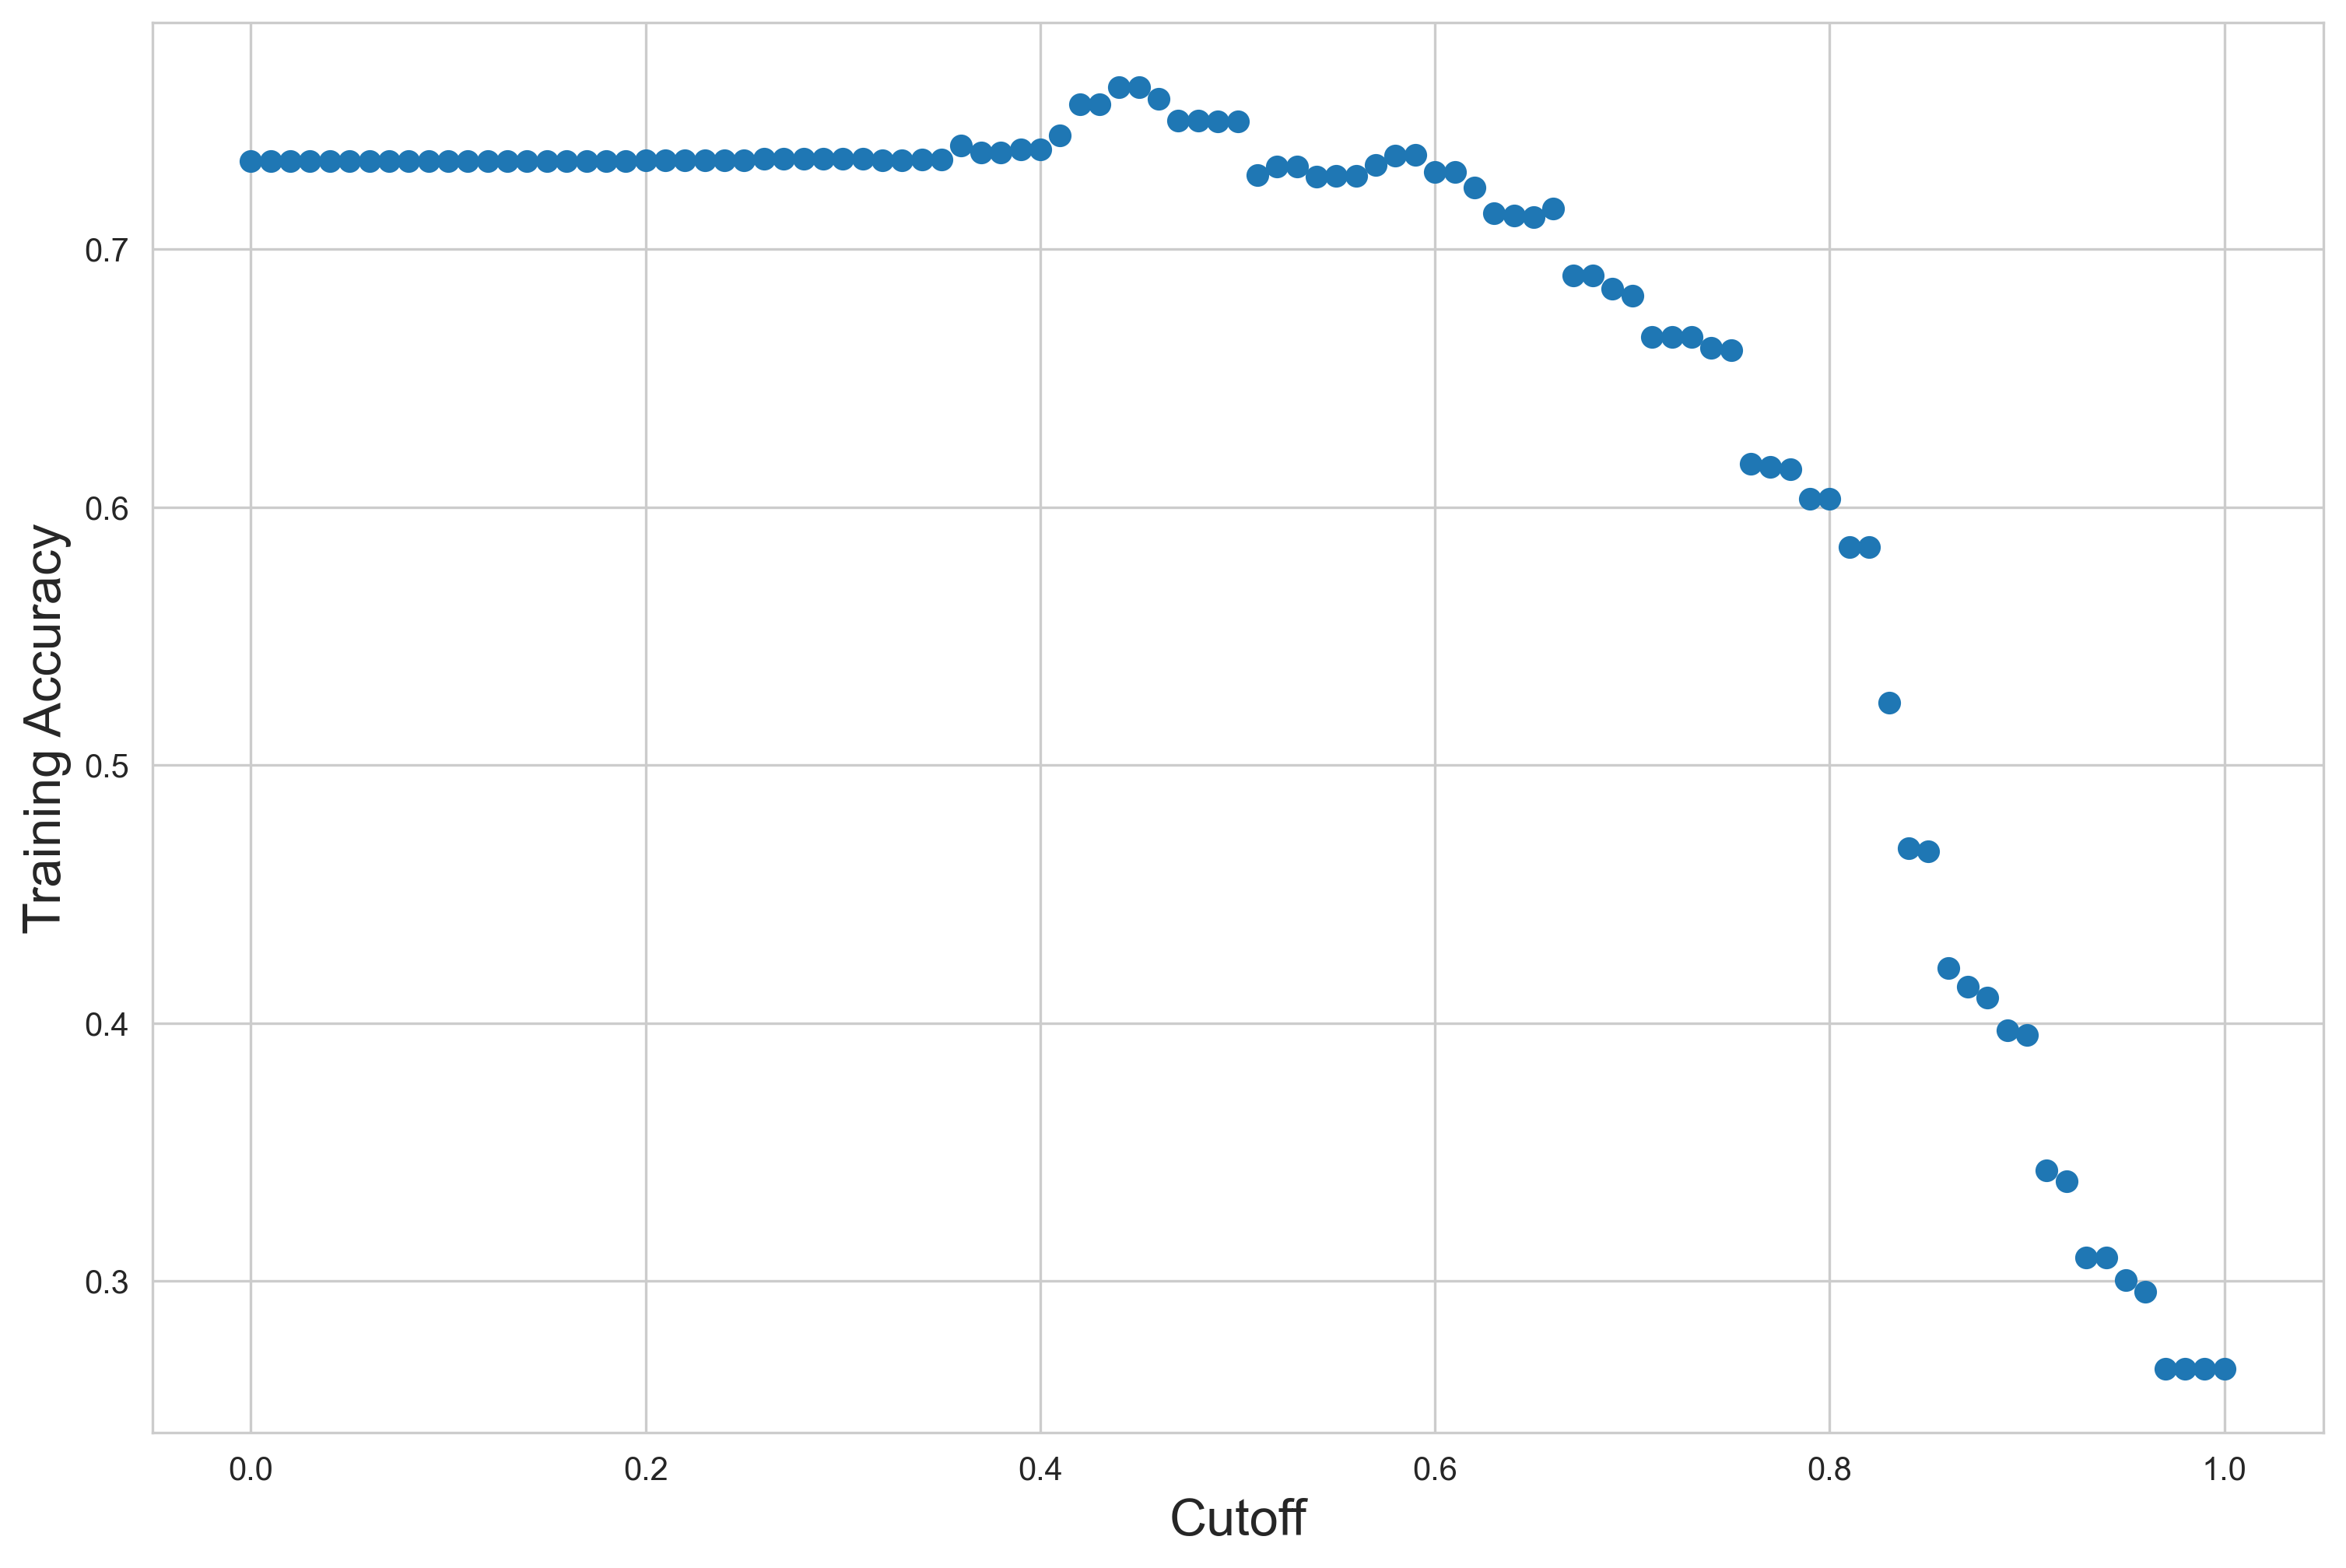

In [399]:
plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

In [400]:
X_test_prob = log_reg.predict_proba(X_test)[:,1]
cutoff = 0.5
Y_test_pred = 1*(X_test_prob>cutoff)

In [401]:
X_train_prob = log_reg.predict_proba(X_train)[:,1]
cutoff = 0.5
Y_train_pred = 1*(X_train_prob>cutoff)

In [402]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_test_pred)

0.7533635513346284

In [403]:
accuracy_score(Y_train, Y_train_pred)

0.7495837955051913

In [404]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_train_pred)

0.574320138299157